# Combine SAS and Python processing to evaluate fraud tagging and prediction performance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import auc

%matplotlib inline

In [2]:
filecsv = '/home/lijli06/Work/Retagging/Fifththird/pgm/logNlst/frd_weekly_vol.csv'
df_vol = pd.read_csv(filecsv,encoding='latin-1')
temp1 =df_vol[df_vol['date']=='31DEC17']['week_vol'].values
temp2 =df_vol[df_vol['date']=='06JAN18']['week_vol'].values
df_vol.loc[df_vol['date']=='31DEC17','week_vol'] = np.NaN
df_vol.loc[df_vol['date']=='06JAN18','week_vol'] = temp1 + temp2
df_vol[df_vol['date']=='06JAN18']['week_vol']
df_vol.head(10)


,date,week,year,week_vol,day_vol
0,15JUL15,28,2015,2.0,2
1,20JUL15,29,2015,1.0,1
2,26JUL15,30,2015,5.0,5
3,08AUG15,31,2015,1.0,1
4,23AUG15,34,2015,2.0,2
5,16SEP15,37,2015,NaN,2
6,17SEP15,37,2015,4.0,2
7,20SEP15,38,2015,1.0,1
8,08OCT15,40,2015,NaN,2
9,10OCT15,40,2015,3.0,1


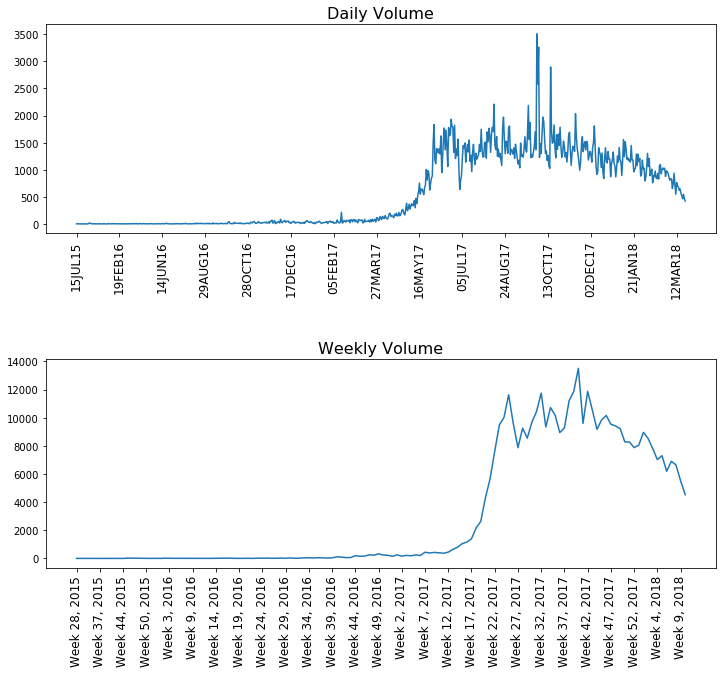

In [4]:
fig, ax = plt.subplots(2,1,figsize=(12,10))
ax[0].plot(df_vol['day_vol'])
ax[0].set_xticks(np.linspace(start=0,stop=700,num=15))
ax[0].set_xticklabels(df_vol['date'][0::50], rotation=90, fontsize=12)
ax[0].set_title('Daily Volume', fontsize=16)

ax[1].plot(df_vol[~np.isnan(df_vol['week_vol'])]['week_vol'].reset_index(drop=True))
week = df_vol[~np.isnan(df_vol['week_vol'])]['week'].values
year = df_vol[~np.isnan(df_vol['week_vol'])]['year'].values

xlabels = ['Week ' + str(week[i]) +', ' + str(year[i]) for i in range(len(week))]
ax[1].set_xticks(np.linspace(start=0,stop=130,num=27))
ax[1].set_xticklabels(xlabels[0::5], rotation=90, fontsize=12)
ax[1].set_title('Weekly Volume', fontsize=16)

plt.subplots_adjust(hspace=0.6)

In [5]:
#Check the monthly volume for each rangeid
filecsv = '/home/lijli06/Work/Retagging/Fifththird/pgm/logNlst/rangeid_vol.csv'
df_vol = pd.read_csv(filecsv,encoding='latin-1')
df_vol = df_vol[~np.isnan(df_vol['rangeid'])].reset_index(drop=True)
df_vol['rangeid']=df_vol['rangeid'].astype(int)
# df_vol[pd.notnull(df_vol['mlacc_maskpan'])]
df_vol.head(10)
# df_vol.sort_values(by='year', ascending=True)

,mlacc_maskpan,date,week,month,year,rangeid,month_vol,week_vol,day_vol
0,NaN,19MAY17,20,5,2017,61048,1.0,1.0,1
1,NaN,04JUN17,23,6,2017,61048,NaN,2.0,2
2,NaN,13JUN17,24,6,2017,61048,NaN,1.0,1
3,NaN,20JUN17,25,6,2017,61048,NaN,NaN,2
4,NaN,24JUN17,25,6,2017,61048,6.0,3.0,1
5,NaN,05JUL17,27,7,2017,61048,NaN,NaN,4
6,NaN,06JUL17,27,7,2017,61048,NaN,6.0,2
7,NaN,09JUL17,28,7,2017,61048,NaN,1.0,1
8,NaN,19JUL17,29,7,2017,61048,NaN,NaN,1
9,NaN,21JUL17,29,7,2017,61048,NaN,5.0,4


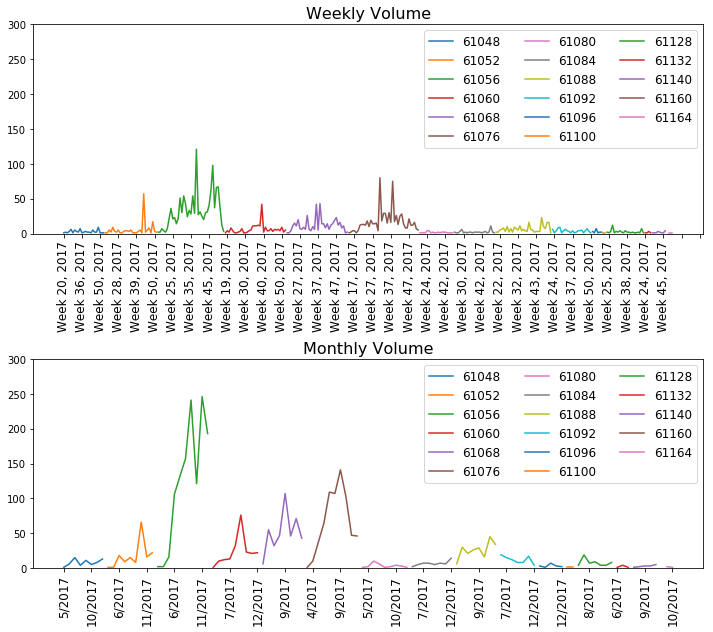

In [6]:
#get the unique rangeid
uq_rangeid = np.unique(df_vol['rangeid'])
# print(uq_rangeid)
uq_range_vol = df_vol.groupby(['rangeid'])['day_vol'].sum().reset_index()
uq_range_vol.rename(index=str, columns={'day_vol':'rangeid_vol'},inplace=True)

fig, ax = plt.subplots(2,1,figsize=(12,10))

df_week = df_vol[~np.isnan(df_vol['week_vol'])].reset_index(drop=True)
week = df_week['week'].values
year_w = df_week['year'].values

df_month = df_vol[~np.isnan(df_vol['month_vol'])].reset_index(drop=True)
month = df_month['month'].values
year_m = df_month['year'].values

for rangeid in uq_rangeid:
    dfw = df_week[df_week['rangeid']==rangeid]
    ax[0].plot(dfw.index, dfw['week_vol'], label=str(rangeid));
    # ax[0].plot(dfw.index, dfw['week_vol']/uq_range_vol[uq_range_vol['rangeid']==rangeid]['rangeid_vol'].values, label=str(rangeid));
    
    dfm = df_month[df_month['rangeid']==rangeid]
    ax[1].plot(dfm.index, dfm['month_vol'], label=str(rangeid));
    # ax[1].plot(dfm.index, dfm['month_vol']/uq_range_vol[uq_range_vol['rangeid']==rangeid]['rangeid_vol'].values, label=str(rangeid));
    

# print(len(week))
# print(len(month))

xlab_w = ['Week ' + str(week[i]) +', ' + str(year_w[i]) for i in range(len(week))]
ax[0].set_xticks(np.linspace(start=0,stop=350,num=36))
ax[0].set_xticklabels(xlab_w[0::10], rotation=90, fontsize=12)
ax[0].set_title('Weekly Volume', fontsize=16)
ax[0].legend(loc=1, fontsize=12, ncol=3)
ax[0].set_ylim(bottom=0,top=300)

xlab_m = [str(month[i]) +'/' + str(year_m[i]) for i in range(len(month))]
ax[1].set_xticks(np.linspace(start=0,stop=110,num=23))
ax[1].set_xticklabels(xlab_m[0::5], rotation=90, fontsize=12)
ax[1].set_title('Monthly Volume', fontsize=16)
ax[1].legend(loc=1, fontsize=12, ncol=3)
ax[1].set_ylim(bottom=0,top=300)

plt.subplots_adjust(hspace=0.6)

In [ ]:
#fifththird has 32 rangeid's but the match fraud transactions only show 17 rangeid's. The volume of transactions
#in the original api data is checked to see if the rest 15 rangeid's have relatively small volume
filecsv = '/home/lijli06/Work/Retagging/Fifththird/pgm/logNlst/rangeid_txn_vol.csv'
df_rvol = pd.read_csv(filecsv,encoding='latin-1')
df_rvol.loc[np.isnan(df_rvol['fiiss_rangeid']),'fiiss_rangeid']=0
df_rvol['fiiss_rangeid']=df_rvol['fiiss_rangeid'].astype(int)
df_rvol['WHERE'] ='FIFTHTHIRDDC'
df_rvol['CardType']='MasterCard'
df_rvol.loc[df_rvol['fiiss_bin']<500000, 'CardType']='Visa'

zcat_log_rangeid = [61044, 61064, 61104, 61108, 61112, 61116, 61120, 61124, 61136, 61144, 61148, 61152, 61156, 64384, 64388]

for rangeid in df_rvol['fiiss_rangeid'].values:
    if rangeid in uq_rangeid:
        df_rvol.loc[df_rvol['fiiss_rangeid']==rangeid, 'WHERE']='Matched Fraud'
    if rangeid in zcat_log_rangeid:
        df_rvol.loc[df_rvol['fiiss_rangeid']==rangeid, 'WHERE']='FIFTHTHIRDCS'

df_rvol.loc[df_rvol['fiiss_rangeid']==0,'WHERE']='NaN'
df_rvol.loc[df_rvol['fiiss_rangeid']==0,'fiiss_rangeid']='NaN'

In [ ]:
filecsv = '/home/lijli06/Work/Retagging/Fifththird/pgm/logNlst/score_match.csv'
df_score = pd.read_csv(filecsv,encoding='latin-1')
df_score.head(10)

In [9]:
def display_score_dist(data,title,xrange=[0,1],normed=False):
    #compute the histogram of the data
    nbins = int((xrange[1]-xrange[0])/0.05)
    bins = np.linspace(start=xrange[0], stop=xrange[1], num=nbins+1)
    hist, binEdges = np.histogram(data, bins=bins, normed=normed)
    
    fig, ax = plt.subplots(figsize=(6,4))

    width = 1.0/nbins if (1.0/nbins)>=0.05 else 0.05
    xtick=np.linspace(start=xrange[0],stop=xrange[1],num=11)

    ax.bar(binEdges[:-1], hist, width, color='g', align='edge')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title(title, fontsize=15)
    ax.set_xticks(xtick)
    ax.set_xlim(xrange)
    ax.tick_params(labelsize=13)

    plt.show()

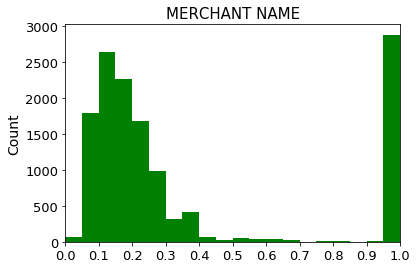

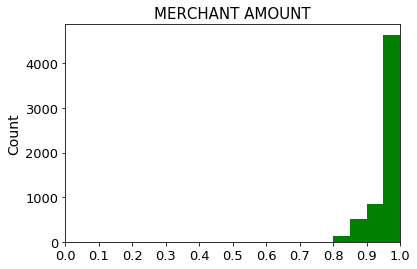

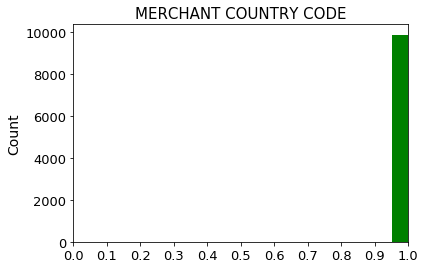

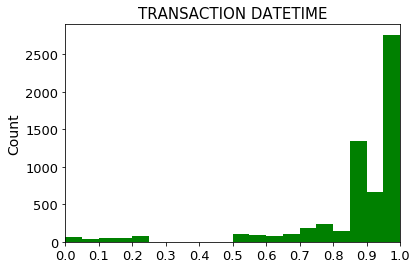

In [10]:
display_score_dist(df_score[df_score['scr_MERCH_NAME']>0]['scr_MERCH_NAME'], 'MERCHANT NAME')
display_score_dist(df_score[df_score['scr_Merchant_Amount']>0]['scr_Merchant_Amount'], 'MERCHANT AMOUNT')
display_score_dist(df_score[df_score['scr_MERCH_COUN_3N']>0]['scr_MERCH_COUN_3N'], 'MERCHANT COUNTRY CODE')
display_score_dist(df_score[df_score['scr_Transaction_date']>0]['scr_Transaction_date'], 'TRANSACTION DATETIME')

In [11]:
df_score[df_score['scr_MERCH_COUN_3N']>=1].shape

(9873, 20)

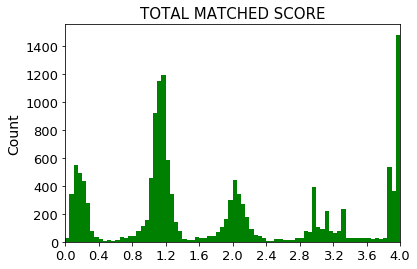

In [12]:
display_score_dist(df_score[df_score['score_match']>0]['score_match'], 'TOTAL MATCHED SCORE', xrange=[0,4])

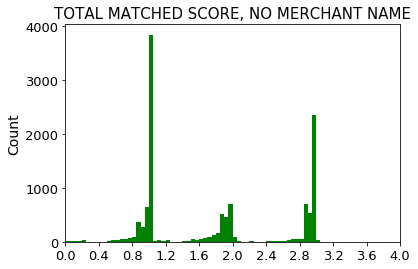

In [13]:
#Score distribution if weight for merchant name matching is set to zero
df_score['score_match_no_mer']=df_score['score_match']-df_score['scr_MERCH_NAME']
display_score_dist(df_score[df_score['score_match_no_mer']>0]['score_match_no_mer'], 'TOTAL MATCHED SCORE, NO MERCHANT NAME', xrange=[0,4])

In [ ]:
#Investigate the merchant name match for match score>3
df_score['mer_grp_count'] = 0
temp = df_score[((df_score['score_match']-df_score['scr_MERCH_NAME'])>=2.7) & (df_score['scr_MERCH_NAME']>=0.2) & (df_score['scr_MERCH_NAME']<0.8)][['at_txmer_mername', 'af_MERCH_NAME','scr_MERCH_NAME', 'mer_grp_count']]
df1 = temp.groupby(['at_txmer_mername','af_MERCH_NAME']).count().reset_index()
df1 = df1.sort_values(by=['at_txmer_mername','af_MERCH_NAME']).reset_index(drop=True)
df2 = temp.groupby(['at_txmer_mername','af_MERCH_NAME'])['at_txmer_mername','af_MERCH_NAME','scr_MERCH_NAME'].head(1).reset_index(drop=True)
df2 = df2.sort_values(by=['at_txmer_mername','af_MERCH_NAME']).reset_index(drop=True)
df = pd.concat([df2, df1['mer_grp_count']], axis=1)
df.sort_values(by=['mer_grp_count','scr_MERCH_NAME'], ascending=False)


In [4]:
filecsv = '/home/lijli06/Work/Retagging/Fifththird/pgm/tagging_eval.csv'
df_org = pd.read_csv(filecsv)
df_org

,n_over_max,n_under_min,n_error,n_indetermined,total_fp,total_tp,total_tx,cum_fp,cum_tp,threshold,marginal_fp,marginal_tp,cum_tx,cum_pct_fp,cum_pct_tp,cum_pct_tx,ks,tfpr
0,0,70,0,0,246548,3503,250051,0,0,1000,0,0,0,0.00%,0.00%,0.00%,0.000000,NaN
1,0,70,0,0,246548,3503,250051,6,0,999,6,0,6,0.00%,0.00%,0.00%,0.000024,NaN
2,0,70,0,0,246548,3503,250051,33,0,998,27,0,33,0.01%,0.00%,0.01%,0.000134,NaN
3,0,70,0,0,246548,3503,250051,53,0,997,20,0,53,0.02%,0.00%,0.02%,0.000215,NaN
4,0,70,0,0,246548,3503,250051,83,0,996,30,0,83,0.03%,0.00%,0.03%,0.000337,NaN
5,0,70,0,0,246548,3503,250051,101,0,995,18,0,101,0.04%,0.00%,0.04%,0.000410,NaN
6,0,70,0,0,246548,3503,250051,112,0,994,11,0,112,0.05%,0.00%,0.04%,0.000454,NaN
7,0,70,0,0,246548,3503,250051,143,0,993,31,0,143,0.06%,0.00%,0.06%,0.000580,NaN
8,0,70,0,0,246548,3503,250051,152,0,992,9,0,152,0.06%,0.00%,0.06%,0.000617,NaN
9,0,70,0,0,246548,3503,250051,162,0,991,10,0,162,0.07%,0.00%,0.06%,0.000657,NaN


In [ ]:
filecsv = '/home/lijli06/Work/Retagging/Fifththird/pgm/retagging_eval.csv'
df_ret = pd.read_csv(filecsv)
df_ret

In [17]:
def compare_org_retag(org, ret):
    per2fl = lambda x: float(x.strip('%'))
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    
    plt.subplots_adjust(wspace=0.4)
    
    ax[0].plot(org['threshold'], org['cum_pct_tx'].apply(per2fl), 'g-', label='Only matching')
    ax[0].plot(ret['threshold'], ret['cum_pct_tx'].apply(per2fl), 'r-', label='After retagging')
    ax[0].set_xlabel('Score', fontsize=13)
    ax[0].set_ylabel('Transaction Outsort Rate', fontsize=13)
    ax[0].legend()
    
    ax[1].plot(org['threshold'], org['cum_pct_tp'].apply(per2fl), 'g-', label='Only matching')
    ax[1].plot(ret['threshold'], ret['cum_pct_tp'].apply(per2fl), 'r-', label='After retagging')
    ax[1].set_xlabel('Score', fontsize=13)
    ax[1].set_ylabel('Transaction Detection Rate', fontsize=13)
    ax[1].legend()
    
    auc_before = auc(org['cum_pct_tx'].apply(per2fl)/100, org['cum_pct_tp'].apply(per2fl)/100)
    auc_after = auc(ret['cum_pct_tx'].apply(per2fl)/100, ret['cum_pct_tp'].apply(per2fl)/100)
    ax[2].plot(org['cum_pct_tx'].apply(per2fl), org['cum_pct_tp'].apply(per2fl), 'g-', \
               label='Before, auc={:.3f}'.format(auc_before))
    ax[2].plot(ret['cum_pct_tx'].apply(per2fl), ret['cum_pct_tp'].apply(per2fl), 'r-', \
               label='After, auc={:.3f}'.format(auc_after))
    ax[2].set_xlabel('Transaction Outsort Rate', fontsize=13)
    ax[2].set_ylabel('Transaction Detection Rate', fontsize=13)
    ax[2].legend()
    
    plt.show()
    

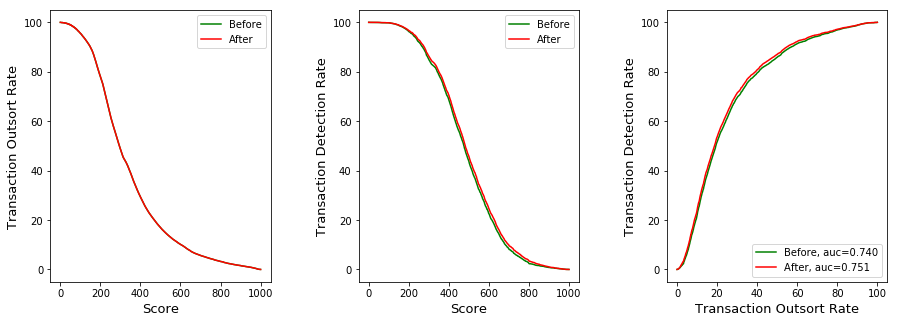

In [18]:
compare_org_retag(df_org, df_ret)

In [ ]:
#compute the difference in fraud rate before and after retagging
df_ftag = pd.read_csv('/home/lijli06/Work/Retagging/Fifththird/pgm/logNlst/final_tagging.csv')
columns = 'systx_sesid mlacc_username mdtag_athctxn mdtag_athctxn_cm mdtag_athctxn_gtag mdtag_athctxn_match mdtag_athctxn_retag txrsp_txnstatus txrsp_predictive_score'
columns = columns.split(' ')
df_ftag = df_ftag[columns]
df_ftag['mdtag_athctxn_mtag'] = df_ftag['mdtag_athctxn_match']
df_ftag['mdtag_athctxn'] = df_ftag['mdtag_athctxn'] | df_ftag['mdtag_athctxn_cm'] | df_ftag['mdtag_athctxn_gtag']

print(len(df_ftag))
df_ftag.head(10)

In [23]:
fr_org = df_ftag['mdtag_athctxn_cm'].sum()/len(df_ftag)*100
fr_gtag = df_ftag['mdtag_athctxn_gtag'].sum()/len(df_ftag)*100
fr_match = df_ftag['mdtag_athctxn_match'].sum()/len(df_ftag)*100
fr_ret = df_ftag['mdtag_athctxn_retag'].sum()/len(df_ftag)*100
fr_mtag = df_ftag['mdtag_athctxn_mtag'].sum()/len(df_ftag)*100
fr_total = df_ftag['mdtag_athctxn'].sum()/len(df_ftag)*100
# fr_total =(df_ftag['mdtag_athctxn'] | df_ftag['mdtag_athctxn_cm'] | df_ftag['mdtag_athctxn_gtag']).sum()/len(df_ftag)*100

fr_mat_n_org = df_ftag[(df_ftag['mdtag_athctxn_cm']==0) & (df_ftag['mdtag_athctxn_match']==1)]['mdtag_athctxn_match'].sum()
fr_mat_n_org = fr_mat_n_org/len(df_ftag)*100

print('Fraud rate from Case Manager is {:.4f}%'.format(fr_org))
print('Fraud rate from global tagging is {:.4f}%'.format(fr_gtag))
print('Fraud rate from matching is {:.4f}%'.format(fr_match))
print('Fraud rate from retagging is {:.4f}%'.format(fr_ret))
print('Fraud rate from matching and retagging is {:.4f}%'.format(fr_mtag))
print('Fraud rate from matching but no Case Manager is {:.4f}%'.format(fr_mat_n_org))
print('Total fraud rate is {:.4f}%'.format(fr_total))

Fraud rate from Case Manager is 3.5123%
Fraud rate from global tagging is 0.4926%
Fraud rate from matching is 1.4005%
Fraud rate from retagging is 0.2203%
Fraud rate from matching and retagging is 1.6208%
Fraud rate from matching but no Case Manager is 1.2218%
Total fraud rate is 5.2718%
